In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from vat_algorithms import VAT
from vat_algorithms import iVAT
from tqdm import tqdm

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

iVAT Processing: 100%|██████████| 99/99 [00:00<00:00, 97427.52it/s]


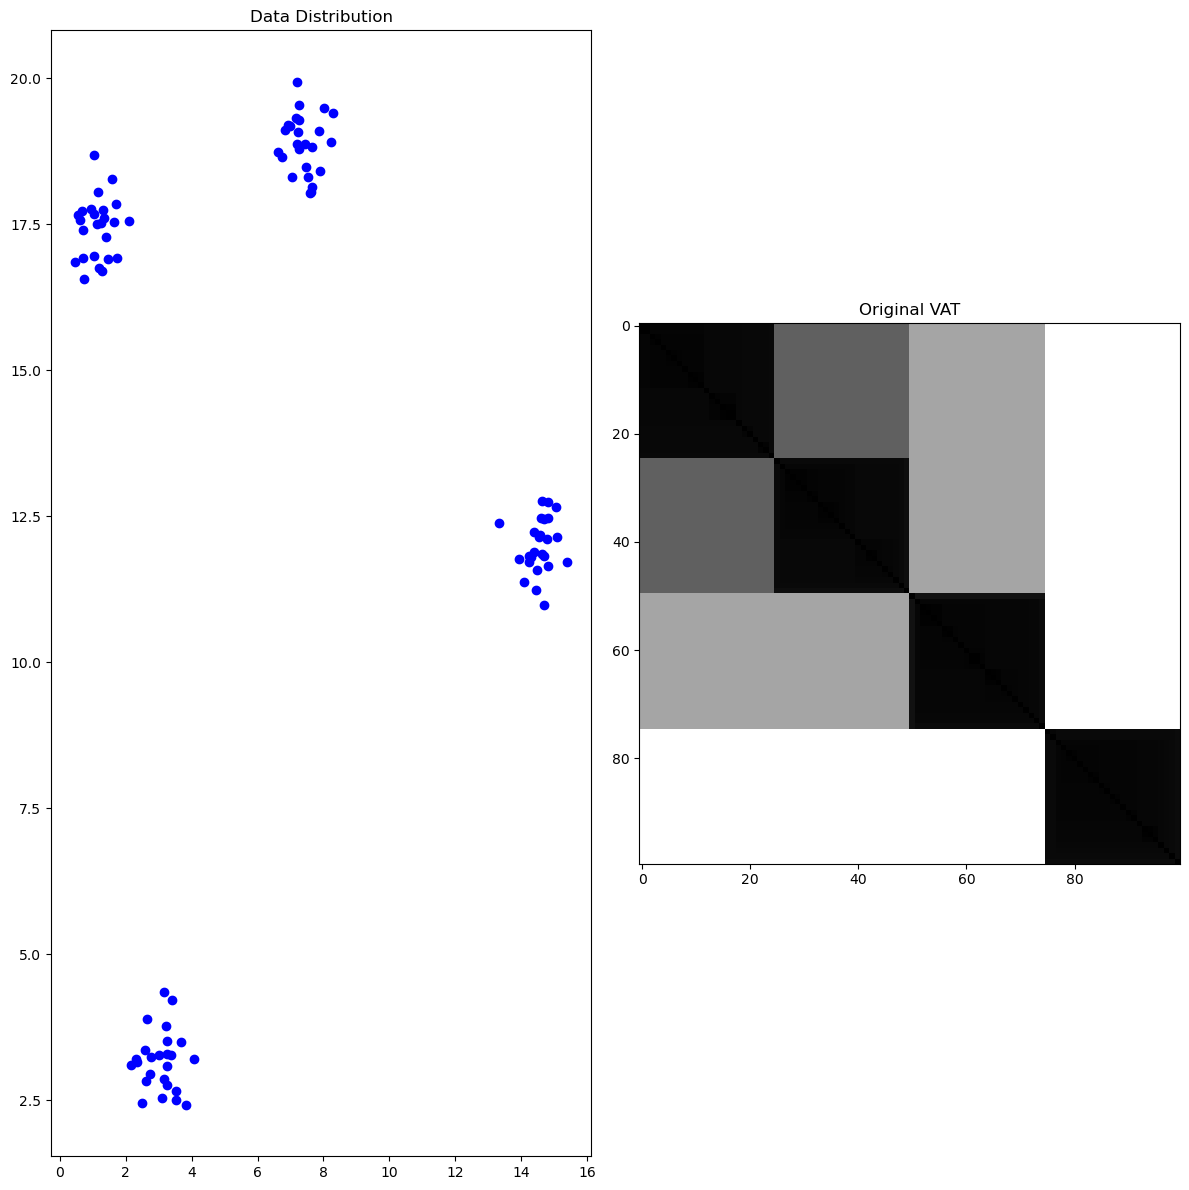

In [3]:
def image_test():
    # Generate a synthetic dataset with 4 clusters

    # data, _ = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_classes=2, n_clusters_per_class=1,
    #                             class_sep=2.0, shuffle=True)

    # change center_box value to manipulate the data distribution
    data, _ = make_blobs(n_samples=100, centers=4, cluster_std=0.5, random_state=42, center_box=(0, 20))
    
    # # Compute the dissimilarity matrix (Euclidean distance)
    # pairwise_dist = np.linalg.norm(data[:, np.newaxis] - data, axis=2)

    # use cdist to compute the pairwise distance
    pairwise_dist = cdist(data, data)

    # Apply the original VAT function
    # RV_original, _, _, _, _ = VAT.VAT(pairwise_dist)
    RV_original, _, _ = iVAT.iVAT(pairwise_dist)

    # Plotting
    plt.figure(figsize=(12, 12))

    # Data distribution
    plt.subplot(1, 2, 1)
    plt.scatter(data[:, 0], data[:, 1], c='blue', marker='o')
    plt.title('Data Distribution')

    # Original VAT
    plt.subplot(1, 2, 2)
    plt.imshow(RV_original, cmap='gray')
    plt.title('Original VAT')

    plt.tight_layout()
    plt.show()

# To run the comparison, you can call:
image_test()